# ☀️ Projet 1 : Prévision de la Production d'Énergie Solaire
## 🟢 VERSION DÉBUTANT

---

### 🎯 Le Pourquoi de Ce Projet
L'énergie solaire est **variable** - parfois nous avons beaucoup de soleil, parfois très peu. Les opérateurs de réseau électrique doivent **équilibrer** l'offre et la demande en tout temps. Si nous pouvons **prédire** combien d'énergie nos panneaux solaires produiront demain, nous pouvons :
- ✅ Éviter les pannes de courant
- ✅ Réduire l'utilisation de combustibles fossiles
- ✅ Économiser de l'argent

### 📊 Vos Données
Vous avez **800 enregistrements horaires** d'une ferme solaire avec :
- **Météo** : Température, Couverture Nuageuse, Humidité, Vitesse du Vent
- **Production** : Production_Energie (notre objectif à prédire)

### 🗺️ Feuille de Route (3 Sessions de 45 min)
1. **Session 1** : Nettoyer les données et explorer
2. **Session 2** : Créer des nouvelles variables intelligentes
3. **Session 3** : Entraîner un modèle de prédiction
4. **Bonus** : Tâches secondaires cool !

---

# 📋 SESSION 1 : From Raw Data to Clean Insights (45 min)


## Part 1: The Setup (10 min)

### 📘 Théorie : Qu'est-ce que nous faisons ici ?
Pensez à une recette de cuisine. Avant de commencer à cuisiner, vous devez :
1. Sortir tous les ingrédients (Charger les données)
2. Vérifier leur fraîcheur (Examiner la qualité)
3. Les préparer (Nettoyer)

C'est exactement ce que nous faisons avec les données !

### 🛠️ Étape 1.1 : Importer les Bibliothèques

In [2]:
# Les outils dont nous avons besoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pour rendre nos graphiques plus jolis
plt.style.use('ggplot')

print("✅ Bibliothèques chargées avec succès !")

✅ Bibliothèques chargées avec succès !


### 🛠️ Étape 1.2 : Charger les Données

In [4]:
# Charger le fichier CSV
df = pd.read_csv('energie_solaire.csv')

# Regarder les premières lignes
print("📊 Aperçu des données :")
print(df.head())

print(f"\n✅ Dataset chargé : {df.shape[0]} lignes et {df.shape[1]} colonnes")

📊 Aperçu des données :
            Horodatage  Temperature  Couverture_Nuageuse  Humidite  \
0  2023-01-01 00:00:00        17.83                   90        47   
1  2023-01-01 01:00:00        -0.36                   11        19   
2  2023-01-01 02:00:00        -0.61                   41        10   
3  2023-01-01 03:00:00         5.28                   85        38   
4  2023-01-01 04:00:00        27.95                   58        90   

   Vitesse_Vent  Production_Energie  
0         29.45                 0.0  
1         10.94                 0.0  
2         17.51                 0.0  
3         11.53                 0.0  
4          8.32                 0.0  

✅ Dataset chargé : 800 lignes et 6 colonnes


### 🛠️ Étape 1.3 : Premier Aperçu

In [5]:
# Voir les informations générales
print("📋 Informations sur le Dataset :")
print(df.info())

print("\n📊 Statistiques Descriptives :")
print(df.describe())

📋 Informations sur le Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Horodatage           800 non-null    object 
 1   Temperature          770 non-null    float64
 2   Couverture_Nuageuse  800 non-null    int64  
 3   Humidite             800 non-null    int64  
 4   Vitesse_Vent         774 non-null    float64
 5   Production_Energie   800 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 37.6+ KB
None

📊 Statistiques Descriptives :
       Temperature  Couverture_Nuageuse    Humidite  Vitesse_Vent  \
count   770.000000           800.000000  800.000000    774.000000   
mean     17.819571            51.945000   53.283750     14.594186   
std      13.328604            29.507505   26.101961      8.681733   
min      -9.770000             0.000000   10.000000      0.000000   
25%       6.637500  

### ❓ Question de Réflexion
> Regardez la sortie de `df.info()`. Y a-t-il des colonnes avec des valeurs manquantes (Non-Null Count < 800) ?

---
## Part 2: The Sanity Check (15 min)

### 📘 Théorie : Pourquoi Nettoyer ?
Les données du monde réel sont **désordonnées**. Imaginez que vous comptez des pommes dans un panier, mais certaines sont pourries ou manquantes. Vous devez les identifier et décider quoi faire :
- **Valeurs Manquantes** : Comme des trous dans votre dataset
- **Duplicatas** : Compter la même pomme deux fois
- **Mauvais Types** : Confondre un nombre avec du texte

### 🛠️ Étape 2.1 : Vérifier les Valeurs Manquantes

❌ Valeurs Manquantes par Colonne :
Temperature     30
Vitesse_Vent    26
dtype: int64


C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


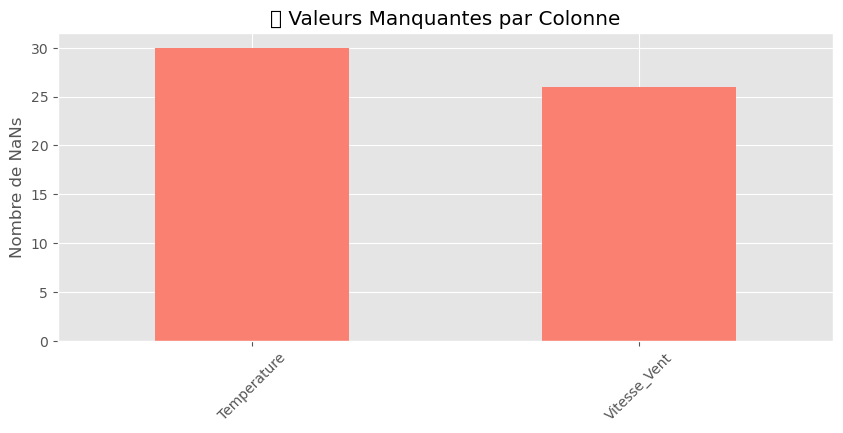

In [6]:
# Compter les valeurs manquantes par colonne
missing = df.isnull().sum()

print("❌ Valeurs Manquantes par Colonne :")
print(missing[missing > 0])  # Afficher seulement les colonnes avec des NaNs

# Visualiser
if missing.sum() > 0:
    plt.figure(figsize=(10, 4))
    missing[missing > 0].plot(kind='bar', color='salmon')
    plt.title('📉 Valeurs Manquantes par Colonne')
    plt.ylabel('Nombre de NaNs')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("✅ Aucune valeur manquante !")

### 🛠️ Étape 2.2 : Remplir les Valeurs Manquantes

> **💡 Tip :** Pour les données météo, utiliser la **médiane** est souvent mieux que la moyenne car elle ignore les valeurs extrêmes.

In [ ]:
# Remplir les NaNs dans 'Temperature' avec la médiane
if df['Temperature'].isnull().sum() > 0:
    median_temp = df['Temperature'].median()
    df['Temperature'].fillna(median_temp, inplace=True)
    print(f"✅ Temperature : Rempli avec médiane = {median_temp:.2f}°C")

# TODO: Répétez pour 'Vitesse_Vent'
# if df['Vitesse_Vent'].isnull().sum() > 0:
#     median_wind = df['Vitesse_Vent'].median()
#     df['Vitesse_Vent'].fillna(median_wind, inplace=True)
#     print(f"✅ Vitesse_Vent : Rempli avec médiane = {median_wind:.2f} km/h")

print("\n✅ Nettoyage terminé !")

✅ Temperature : Rempli avec médiane = 18.09°C
✅ Vitesse_Vent : Rempli avec médiane = 14.79 km/h

✅ Nettoyage terminé !


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_8364\2066906650.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(median_temp, inplace=True)
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_8364\2066906650.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

### 🛠️ À vous de jouer !
Décommentez le code ci-dessus pour remplir les valeurs manquantes de `Vitesse_Vent`.

### 🛠️ Étape 2.3 : Vérifier les Duplicatas

In [8]:
# Compter les lignes dupliquées
duplicates = df.duplicated().sum()
print(f"🔍 Lignes Dupliquées : {duplicates}")

# Supprimer si nécessaire
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ {duplicates} duplicatas supprimés")
else:
    print("✅ Aucun duplicata trouvé")

🔍 Lignes Dupliquées : 0
✅ Aucun duplicata trouvé


### 🛠️ Étape 2.4 : Convertir les Types de Données

In [9]:
# Convertir 'Horodatage' en type datetime
df['Horodatage'] = pd.to_datetime(df['Horodatage'])

print("✅ Type de 'Horodatage' converti :")
print(df['Horodatage'].dtype)

✅ Type de 'Horodatage' converti :
datetime64[ns]


---
## Part 3: Exploratory Data Analysis (20 min)

### 📘 Théorie : Qu'est-ce que l'EDA ?
**E**xploratory **D**ata **A**nalysis = "Apprendre à connaître vos données"

C'est comme regarder un nouveau terrain avant de construire une maison. Vous voulez savoir :
- Quelles sont les valeurs typiques ? (Moyenne, Médiane)
- Y a-t-il des valeurs bizarres ? (Outliers)
- Comment les choses sont-elles liées ? (Corrélations)

### 🛠️ Étape 3.1 : Distribution de la Variable Cible

C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


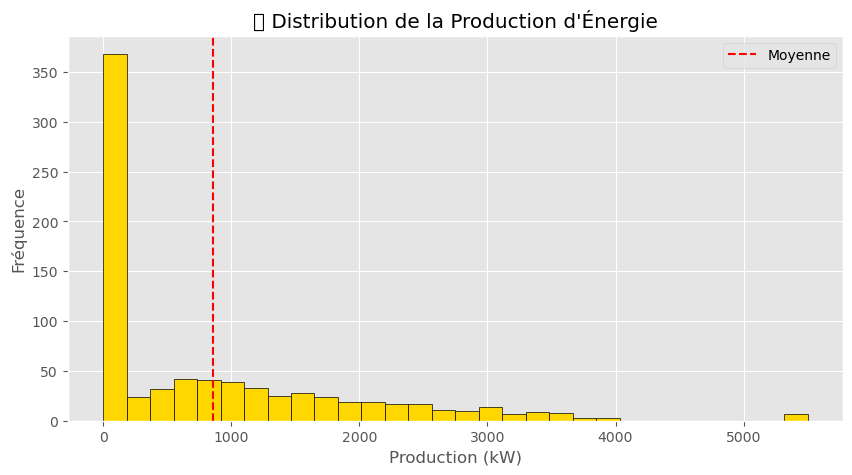

Moyenne : 854.90 kW
Médiane : 416.50 kW


In [10]:
# Visualiser la distribution de Production_Energie
plt.figure(figsize=(10, 5))
plt.hist(df['Production_Energie'], bins=30, color='gold', edgecolor='black')
plt.title('📊 Distribution de la Production d\'Énergie')
plt.xlabel('Production (kW)')
plt.ylabel('Fréquence')
plt.axvline(df['Production_Energie'].mean(), color='red', linestyle='--', label='Moyenne')
plt.legend()
plt.show()

print(f"Moyenne : {df['Production_Energie'].mean():.2f} kW")
print(f"Médiane : {df['Production_Energie'].median():.2f} kW")

### ❓ Question de Réflexion
> Pourquoi y a-t-il beaucoup de valeurs à **0 kW** ? (Indice : Pensez à la nuit !)

### 🛠️ Étape 3.2 : Relation entre Variables

C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


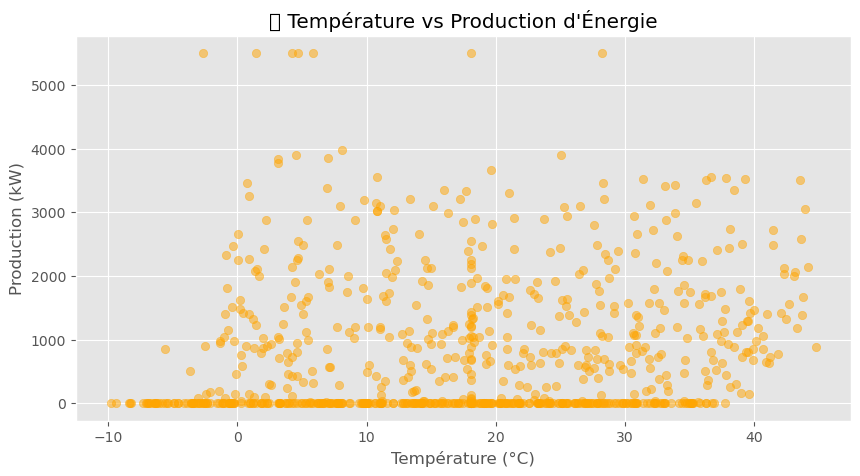

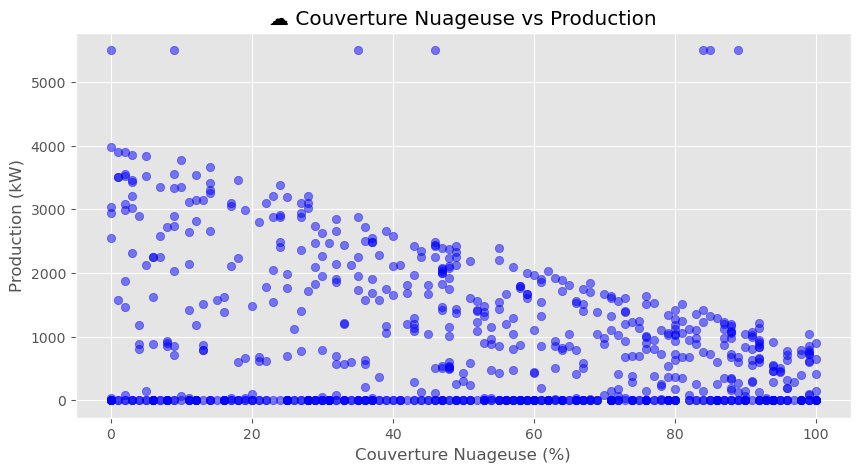

In [ ]:
# Scatter plot : Temperature vs Production_Energie
plt.figure(figsize=(10, 5))
plt.scatter(df['Temperature'], df['Production_Energie'], alpha=0.5, color='orange')
plt.title('🌡️ Température vs Production d\'Énergie')
plt.xlabel('Température (°C)')
plt.ylabel('Production (kW)')
plt.grid(True)
plt.show()

# TODO: Créez un scatter plot pour Couverture_Nuageuse vs Production_Energie
# plt.figure(figsize=(10, 5))
# plt.scatter(df['Couverture_Nuageuse'], df['Production_Energie'], alpha=0.5, color='blue')
# plt.title('☁️ Couverture Nuageuse vs Production')
# plt.xlabel('Couverture Nuageuse (%)')
# plt.ylabel('Production (kW)')
# plt.show()

### 🛠️ À vous de jouer !
Décommentez le code ci-dessus pour voir l'impact des nuages sur la production.

### 🛠️ Étape 3.3 : Matrice de Corrélation

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_8364\58013187.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


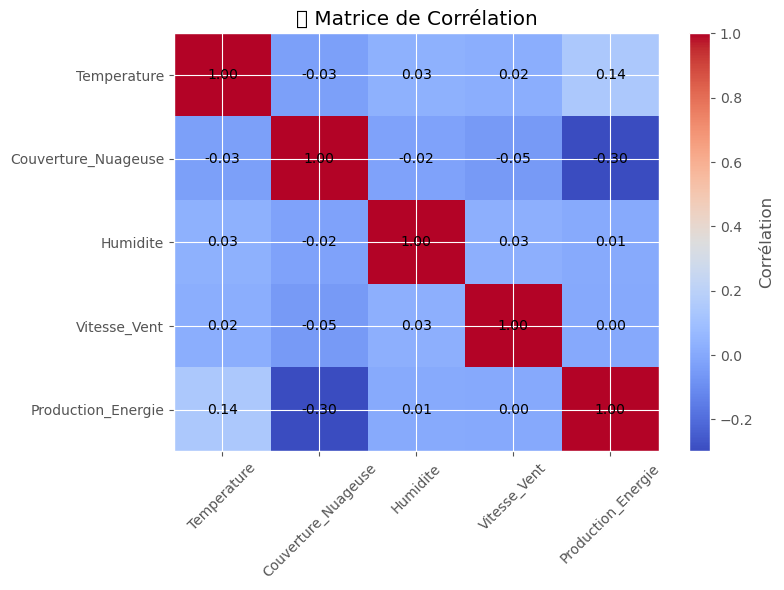


📌 Corrélations avec Production_Energie :
Production_Energie     1.000000
Temperature            0.144127
Humidite               0.006002
Vitesse_Vent           0.004895
Couverture_Nuageuse   -0.299070
Name: Production_Energie, dtype: float64


In [12]:
# Calculer les corrélations
corr = df[['Temperature', 'Couverture_Nuageuse', 'Humidite', 'Vitesse_Vent', 'Production_Energie']].corr()

# Visualiser
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Corrélation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('🔥 Matrice de Corrélation')

# Ajouter les valeurs dans les cellules
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print("\n📌 Corrélations avec Production_Energie :")
print(corr['Production_Energie'].sort_values(ascending=False))

### ❓ Question de Réflexion
> Quelle variable a la **corrélation négative** la plus forte avec la production ? Pourquoi cela fait-il sens ?

---
# 📋 SESSION 2 : The Art of Feature Engineering (45 min)

### 📘 Théorie : Qu'est-ce que le Feature Engineering ?
C'est l'art de **créer de nouvelles variables** à partir des anciennes pour aider le modèle à mieux comprendre.

**Analogie** : Vous avez la date de naissance d'une personne. C'est bien, mais **calculer l'âge** est beaucoup plus utile !

Pour notre projet solaire, nous allons créer :
- 🕐 **Features de Date** : Heure, Jour, Mois (le soleil se comporte différemment à différentes heures !)
- ➗ **Features Mathématiques** : Interactions (Temp × Humidité), Polynomiales (Temp²)


## Part 1: The Concept (10 min)

### 📘 Pourquoi ces features sont importantes ?

**Exemple 1 : L'Heure**
- Production à **3h du matin** = 0 kW (nuit)
- Production à **14h** = Maximum (midi)

Sans savoir l'heure, le modèle est aveugle !

**Exemple 2 : Ratio Humidité/Température**
- Haute humidité + Basse température = Brouillard → Moins de production
- Basse humidité + Haute température = Ciel clair → Plus de production


## Part 2: The Lab - Choose Your Recipe (30 min)

### 🕐 Recipe 1: Dates & Time

### 🛠️ Étape 2.1 : Extraire les Features Temporelles

In [ ]:
# Extraire l'heure
df['Heure'] = df['Horodatage'].dt.hour
print("✅ Feature créée : Heure")

# TODO: Extraire le mois
# df['Mois'] = df['Horodatage'].dt.month
# print("✅ Feature créée : Mois")

# TODO: Extraire le jour de la semaine (0=Lundi, 6=Dimanche)
# df['Jour_Semaine'] = df['Horodatage'].dt.dayofweek
# print("✅ Feature créée : Jour_Semaine")

# Créer une feature "Est_Journee" (6h-18h)
df['Est_Journee'] = ((df['Heure'] >= 6) & (df['Heure'] <= 18)).astype(int)
print("✅ Feature créée : Est_Journee (1=Oui, 0=Non)")

print("\n📊 Aperçu :")
print(df[['Horodatage', 'Heure', 'Est_Journee']].head())

### 🛠️ À vous de jouer !
Décommentez le code ci-dessus pour créer les features `Mois` et `Jour_Semaine`.

### 🛠️ Étape 2.2 : Visualiser l'Impact de l'Heure

In [ ]:
# Production moyenne par heure
hourly_avg = df.groupby('Heure')['Production_Energie'].mean()

plt.figure(figsize=(12, 5))
hourly_avg.plot(kind='bar', color='orange')
plt.title('☀️ Production Moyenne par Heure de la Journée')
plt.xlabel('Heure')
plt.ylabel('Production Moyenne (kW)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(f"\n⏰ Heure la plus productive : {hourly_avg.idxmax()}h ({hourly_avg.max():.2f} kW)")

### ❓ Question de Réflexion
> À quelle heure la production est-elle maximale ? Cela correspond-il à ce que vous attendez ?

### ➗ Recipe 4: Math Magic

### 🛠️ Étape 2.3 : Features Polynomiales

In [ ]:
# Carré de la température (effets non-linéaires)
df['Temperature_Squared'] = df['Temperature'] ** 2
print("✅ Feature créée : Temperature_Squared")

# TODO: Créez Couverture_Nuageuse_Squared
# df['Couverture_Nuageuse_Squared'] = df['Couverture_Nuageuse'] ** 2
# print("✅ Feature créée : Couverture_Nuageuse_Squared")

### 🛠️ Étape 2.4 : Features d'Interaction

In [ ]:
# Interaction : Temperature × (100 - Couverture_Nuageuse)
# Plus il fait chaud ET moins il y a de nuages = Plus de production
df['Temp_x_Clarte'] = df['Temperature'] * (100 - df['Couverture_Nuageuse'])
print("✅ Feature créée : Temp_x_Clarte")

# Ratio : Humidité / Température (proxy pour brouillard)
df['Ratio_Hum_Temp'] = df['Humidite'] / (df['Temperature'] + 1)  # +1 pour éviter division par 0
print("✅ Feature créée : Ratio_Hum_Temp")

print("\n📊 Aperçu des nouvelles features :")
print(df[['Temperature', 'Couverture_Nuageuse', 'Temp_x_Clarte', 'Ratio_Hum_Temp']].head())

## Part 3: Final Prep (5 min)

### 🛠️ Étape 2.5 : Vérification Finale

In [ ]:
# Vérifier s'il reste des NaNs
print("🔍 Vérification des NaNs :")
print(df.isnull().sum())

# Afficher les colonnes
print("\n📋 Colonnes disponibles :")
print(df.columns.tolist())

print(f"\n✅ Dataset final : {df.shape[0]} lignes, {df.shape[1]} colonnes")

### 🛠️ Étape 2.6 : Sauvegarder le Dataset Préparé

In [ ]:
# Sauvegarder pour Session 3
df.to_csv('energie_solaire_prepared.csv', index=False)
print("✅ Dataset sauvegardé : energie_solaire_prepared.csv")

---
# 📋 SESSION 3 : Building & Trusting Your Model (45 min)

### 📘 Théorie : Qu'est-ce que la Régression ?
Notre objectif est de **prédire un nombre** (Production_Energie). C'est différent de la Classification (prédire une catégorie).

**Analogie** : 
- **Classification** = "Cette photo montre-t-elle un chat ou un chien ?" (2 catégories)
- **Régression** = "Combien coûte cette maison ?" (nombre continu)

Nous allons utiliser **Random Forest Regressor**, un algorithme puissant et facile à utiliser.


## Part 1: The Split (10 min)

### 📘 Pourquoi diviser les données ?
Imaginez que vous étudiez pour un examen. Si vous voyez **toutes les questions avant**, vous ne savez pas vraiment si vous comprenez.

C'est pareil pour le modèle :
- **Train** : Données pour apprendre (70-80%)
- **Test** : Données pour évaluer (20-30%)

### 🛠️ Étape 3.1 : Séparer Features (X) et Target (y)

In [ ]:
# Features à utiliser (excluez Horodatage et la cible)
feature_cols = ['Temperature', 'Couverture_Nuageuse', 'Humidite', 'Vitesse_Vent',
                'Heure', 'Est_Journee', 'Temperature_Squared', 'Temp_x_Clarte', 'Ratio_Hum_Temp']

X = df[feature_cols]
y = df['Production_Energie']

print(f"✅ X (Features) : {X.shape}")
print(f"✅ y (Target) : {y.shape}")

### 🛠️ Étape 3.2 : Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Train : {X_train.shape[0]} lignes")
print(f"✅ Test : {X_test.shape[0]} lignes")

---
## Part 2: Training (15 min)

### 📘 Comment fonctionne Random Forest ?
Pensez à un **conseil de sages**. Chaque sage (arbre) donne son avis, puis on fait la **moyenne** de tous les avis.

Pourquoi c'est bien ?
- Un sage peut se tromper
- Mais 100 sages ensemble font rarement de grosses erreurs !

### 🛠️ Étape 3.3 : Entraîner le Modèle

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Créer le modèle (100 arbres)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner
print("🚀 Entraînement en cours...")
model.fit(X_train, y_train)

print("✅ Modèle entraîné avec succès !")

### 🛠️ Étape 3.4 : Faire des Prédictions

In [ ]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Afficher quelques prédictions
comparison = pd.DataFrame({
    'Réel': y_test.values[:10],
    'Prédit': y_pred[:10],
    'Erreur': y_test.values[:10] - y_pred[:10]
})

print("📊 Comparaison Réel vs Prédit (10 premiers) :")
print(comparison)

---
## Part 3: Evaluation (20 min)

### 📘 Comment mesurer la performance ?
Nous avons **3 métriques principales** :

1. **MAE** (Mean Absolute Error) = Erreur moyenne en kW
   - Facile à interpréter : "En moyenne, je me trompe de X kW"

2. **RMSE** (Root Mean Squared Error) = Pénalise les grosses erreurs
   - Plus strict que MAE

3. **R² Score** = Pourcentage de variance expliquée (0 à 1)
   - 1.0 = Parfait
   - 0.8+ = Très bon
   - 0.5- = Faible

### 🛠️ Étape 3.5 : Calculer les Métriques

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculer
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 RÉSULTATS DU MODÈLE :")
print("="*40)
print(f"MAE  : {mae:.2f} kW")
print(f"RMSE : {rmse:.2f} kW")
print(f"R²   : {r2:.3f}")
print("="*40)

if r2 > 0.8:
    print("✅ Excellent modèle !")
elif r2 > 0.6:
    print("👍 Bon modèle")
else:
    print("⚠️ Le modèle peut être amélioré")

### 🛠️ Étape 3.6 : Visualiser les Prédictions

In [ ]:
# Scatter plot : Réel vs Prédit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédiction Parfaite')
plt.title('🎯 Prédictions vs Valeurs Réelles')
plt.xlabel('Production Réelle (kW)')
plt.ylabel('Production Prédite (kW)')
plt.legend()
plt.grid(True)
plt.show()

### ❓ Question de Réflexion
> Si les points sont **près de la ligne rouge**, qu'est-ce que cela signifie ?

### 🛠️ Étape 3.7 : Feature Importance

In [ ]:
# Voir quelles features sont importantes
importances = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('📊 Importance des Features')
plt.gca().invert_yaxis()
plt.show()

print("\n🏆 Top 3 Features :")
print(importances.head(3))

---
# 🎁 Part 4: Going Further (BONUS - 15-30 mins)

Le modèle principal est entraîné ! Maintenant attaquons les défis optionnels du brief.


## Bonus Task 1: Identifier "L'Heure la Plus Efficace" 🕐

### 🎯 Objectif
Trouver à quelle heure de la journée les panneaux solaires produisent le plus d'énergie en moyenne.

### 💡 Pourquoi c'est important ?
Si vous savez que **13h-14h** est l'heure de pointe, vous pouvez :
- Planifier la consommation d'énergie intensive à ce moment
- Vendre l'excédent au meilleur prix

### 🛠️ Votre Code

In [ ]:
# Nous avons déjà fait cela plus tôt, mais récapitulons
production_par_heure = df.groupby('Heure')['Production_Energie'].mean().sort_values(ascending=False)

print("🏆 Top 3 Heures les Plus Productives :")
print(production_par_heure.head(3))

# TODO: Créez un graphique en ligne montrant la production moyenne par heure
# plt.figure(figsize=(12, 5))
# production_par_heure.sort_index().plot(kind='line', marker='o', color='orange')
# plt.title('☀️ Profil de Production Horaire')
# plt.xlabel('Heure')
# plt.ylabel('Production Moyenne (kW)')
# plt.grid(True)
# plt.show()

## Bonus Task 2: Détecter la "Dégradation des Panneaux" 📉

### 🎯 Objectif
Voir si la production **baisse d'année en année** pour les mêmes conditions météo.

### 💡 Pourquoi c'est important ?
Les panneaux solaires perdent environ **0.5-1% d'efficacité par an**. Détecter une baisse aide à planifier la maintenance.

### 🛠️ Votre Code

In [ ]:
# Extraire l'année
df['Annee'] = df['Horodatage'].dt.year

# Production moyenne par année
production_annuelle = df.groupby('Annee')['Production_Energie'].mean()

print("📊 Production Moyenne par Année :")
print(production_annuelle)

# TODO: Créez un graphique en barres
# plt.figure(figsize=(8, 5))
# production_annuelle.plot(kind='bar', color='coral')
# plt.title('📉 Production Moyenne par Année')
# plt.ylabel('Production (kW)')
# plt.xlabel('Année')
# plt.xticks(rotation=0)
# plt.show()

# Calcul du taux de dégradation
if len(production_annuelle) > 1:
    premiere_annee = production_annuelle.iloc[0]
    derniere_annee = production_annuelle.iloc[-1]
    degradation = ((premiere_annee - derniere_annee) / premiere_annee) * 100
    print(f"\n⚠️ Dégradation estimée : {degradation:.2f}% sur la période")

## Bonus Task 3: Regrouper les Jours (Clustering) ☁️

### 🎯 Objectif
Grouper les jours en catégories : "Ensoleillé", "Nuageux", "Mixte".

### 💡 Pourquoi c'est important ?
Au lieu de prédire un nombre exact, on peut dire : "Demain sera un jour Ensoleillé" → Plus facile à comprendre !

### 🛠️ Votre Code

In [ ]:
from sklearn.cluster import KMeans

# Créer un dataset par jour (moyenne quotidienne)
df['Date'] = df['Horodatage'].dt.date
daily_data = df.groupby('Date').agg({
    'Couverture_Nuageuse': 'mean',
    'Production_Energie': 'sum'
}).reset_index()

# Clustering sur Couverture_Nuageuse et Production_Energie
X_cluster = daily_data[['Couverture_Nuageuse', 'Production_Energie']]

kmeans = KMeans(n_clusters=3, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(X_cluster)

# Nommer les clusters
cluster_names = {0: 'Ensoleillé', 1: 'Nuageux', 2: 'Mixte'}
daily_data['Type_Jour'] = daily_data['Cluster'].map(cluster_names)

print("📊 Distribution des Types de Jours :")
print(daily_data['Type_Jour'].value_counts())

# TODO: Créez un scatter plot coloré par cluster
# plt.figure(figsize=(10, 6))
# for cluster in daily_data['Cluster'].unique():
#     cluster_data = daily_data[daily_data['Cluster'] == cluster]
#     plt.scatter(cluster_data['Couverture_Nuageuse'], cluster_data['Production_Energie'], 
#                 label=cluster_names[cluster], alpha=0.6)
# plt.xlabel('Couverture Nuageuse Moyenne (%)')
# plt.ylabel('Production Totale (kW)')
# plt.title('☁️ Clustering des Jours')
# plt.legend()
# plt.grid(True)
# plt.show()

## Bonus Task 4: Calculer le Revenu Potentiel 💰

### 🎯 Objectif
Estimer le revenu annuel basé sur les prix dynamiques de l'électricité.

### 💡 Hypothèses
- Prix heures pleines (8h-20h) : 0.15 €/kWh
- Prix heures creuses (20h-8h) : 0.10 €/kWh

### 🛠️ Votre Code

In [ ]:
# Définir les prix
df['Prix_kWh'] = df['Heure'].apply(lambda h: 0.15 if 8 <= h < 20 else 0.10)

# Calculer le revenu par enregistrement
df['Revenu'] = df['Production_Energie'] * df['Prix_kWh']

# Revenu total sur l'ensemble du dataset
revenu_total = df['Revenu'].sum()

# Extrapoler à une année (si le dataset couvre moins)
nb_jours_dataset = (df['Horodatage'].max() - df['Horodatage'].min()).days
revenu_annuel = revenu_total * (365 / nb_jours_dataset) if nb_jours_dataset > 0 else revenu_total

print(f"💰 Revenu Total (Dataset) : {revenu_total:.2f} €")
print(f"💰 Revenu Annuel Estimé : {revenu_annuel:.2f} €")

# TODO: Visualisez le revenu par mois
# df['Mois'] = df['Horodatage'].dt.month
# revenu_mensuel = df.groupby('Mois')['Revenu'].sum()
# plt.figure(figsize=(10, 5))
# revenu_mensuel.plot(kind='bar', color='green')
# plt.title('💰 Revenu Mensuel')
# plt.xlabel('Mois')
# plt.ylabel('Revenu (€)')
# plt.xticks(rotation=0)
# plt.show()

---
# 🎉 FÉLICITATIONS !

Vous avez complété :
- ✅ Nettoyage de données
- ✅ Feature Engineering
- ✅ Modélisation avec Random Forest
- ✅ 4 Tâches Bonus

## 📚 Pour Aller Plus Loin
1. Essayez d'autres modèles (Gradient Boosting, XGBoost)
2. Ajoutez plus de features (saison, jours fériés)
3. Faites des prédictions pour les **prochaines 24 heures** (données météo futures)

## 🔑 Ce Que Vous Avez Appris
- Les valeurs manquantes sont **normales** - il faut les gérer
- Les features créées (Heure, interactions) sont **souvent plus importantes** que les features brutes
- Un bon R² (>0.8) signifie que votre modèle **capture bien les patterns**

**Bon travail ! 🚀**